In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# create an engine for the 'hawaii.sqlite' database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Explore Database hawaii.sqlite

In [6]:
# use the inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# use the inspector to print the column names and types of the 'measurement' table
col_measurement = inspector.get_columns('measurement')
for c in col_measurement:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [8]:
# display the first 10 rows of the 'measurement' table
engine.execute('select * from measurement order by date desc limit 10').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0)]

In [9]:
# use the inspector to print the column names and types of the 'station' table
col_station = inspector.get_columns('station')
for c in col_station:
    print(c['name'], c['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# display the first 10 rows of the 'station' table
for row in engine.execute('select * from station'):
    print(row)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


# Reflect Tables into SQLAlchemy ORM

In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Step 1 - Climate Analysis and Exploration

## Precipitation Analysis

In [15]:
# Find the most recent date in the database
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date[0])

# Calculate the date 1 year ago from the last data point in the database
year_ago = dt.datetime.strptime(most_recent_date[0], "%Y-%m-%d") - dt.timedelta(days=365.25)
print(year_ago)

2017-08-23
2016-08-22 18:00:00


In [16]:
# Perform a query to retrieve the data and precipitation scores
p_scores = (session
           .query(Measurement.date, Measurement.prcp)
           .filter(Measurement.date >= year_ago)
           .all())
for score in p_scores:
    print(score)

('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('

('2017-02-18', 0.01)
('2017-02-20', None)
('2017-02-22', 0.13)
('2017-02-23', 0.0)
('2017-02-24', 0.0)
('2017-02-26', None)
('2017-02-27', 0.0)
('2017-02-28', 0.0)
('2017-03-01', 0.59)
('2017-03-02', 1.48)
('2017-03-03', 0.25)
('2017-03-04', 0.0)
('2017-03-06', None)
('2017-03-09', None)
('2017-03-10', 0.0)
('2017-03-11', 0.0)
('2017-03-12', 0.0)
('2017-03-13', 0.0)
('2017-03-14', 0.0)
('2017-03-15', 0.0)
('2017-03-16', 0.0)
('2017-03-17', 0.35)
('2017-03-18', 0.0)
('2017-03-19', 0.0)
('2017-03-20', 0.0)
('2017-03-21', 0.0)
('2017-03-22', 0.0)
('2017-03-23', 0.02)
('2017-03-24', 0.07)
('2017-03-25', 0.43)
('2017-03-26', 0.0)
('2017-03-27', 0.0)
('2017-03-28', 0.0)
('2017-03-29', 0.08)
('2017-03-30', 0.0)
('2017-03-31', 0.0)
('2017-04-01', 0.0)
('2017-04-02', 0.0)
('2017-04-03', 0.0)
('2017-04-04', 0.0)
('2017-04-05', 0.0)
('2017-04-06', 0.0)
('2017-04-07', 0.0)
('2017-04-09', None)
('2017-04-10', 0.0)
('2017-04-11', 0.0)
('2017-04-12', 0.0)
('2017-04-13', 0.0)
('2017-04-14', 0.36)
('20

In [17]:
# Save the query results as a Pandas DataFrame
precipitations_raw = pd.DataFrame(p_scores, columns=['date', 'precipitation'])
precipitations = precipitations_raw.dropna()

# Sort the dataframe by date and set index to the date column
precipitations_sorted = precipitations.sort_values('date')
precipitations_sorted.set_index('date', inplace=True)
precipitations_sorted.head(10)

,precipitation
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15
2016-08-23,1.79
2016-08-24,1.22
2016-08-24,0.08
2016-08-24,2.15


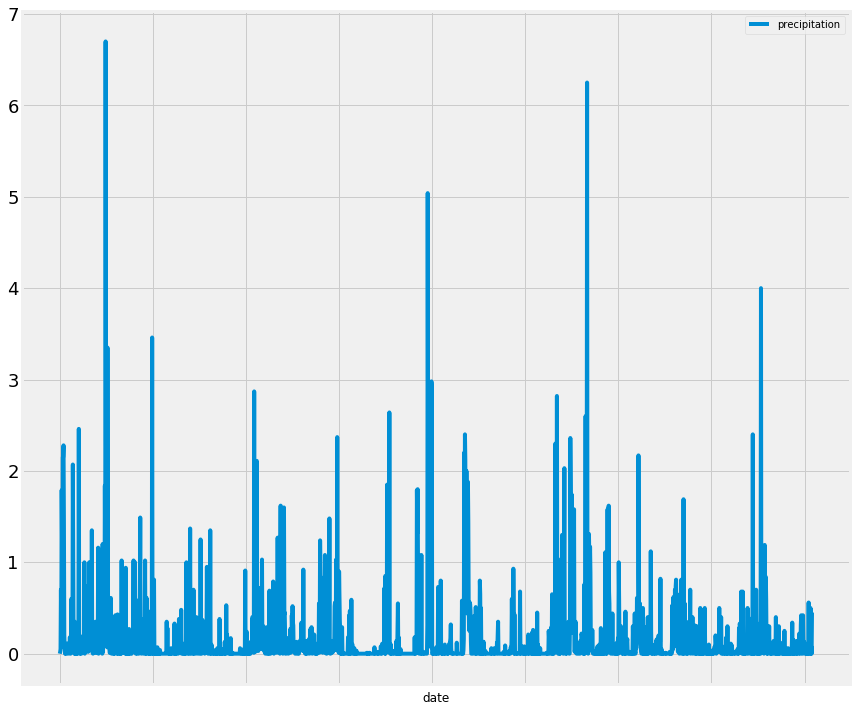

In [18]:
#plt.figure(figsize=(20,20))
p_graph = precipitations_sorted.plot(figsize=(12,10))
p_graph.tick_params(labelsize = 18)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitations_sorted.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
nb_stations = (session
               .query(Measurement.station)
               .distinct()
               .count())
print(f"There are {nb_stations} stations in this dataset.")

There are 9 stations in this dataset.


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = (session
                    .query(Measurement.station, func.count())
                    .group_by(Measurement.station)
                    .order_by(func.count().desc())
                    .all())
for station in station_activity:
    print(station)
    
# Which station has the highest number of observations?
most_active_station = station_activity[0][0]
print(f"Station id {most_active_station} has the highest number of observations.")

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
Station id USC00519281 has the highest number of observations.


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

most_active_station_temp = (session
                .query(*sel)
                .filter(Measurement.station == most_active_station)
                .group_by(Measurement.station)
                .all())

print(f"For station id {most_active_station}:")
print(f"- lowest temperature recorded: {most_active_station_temp[0][0]}")
print(f"- highest temperature recorded: {most_active_station_temp[0][1]}")
print(f"- average temperature: {most_active_station_temp[0][2]}")

For station id USC00519281:
- lowest temperature recorded: 54.0
- highest temperature recorded: 85.0
- average temperature: 71.66378066378067


In [24]:
# Choose the station with the highest number of temperature observations
# Determine the last year time frame for most active station
last_date_most_active = (session
                         .query(Measurement.date)
                         .filter(Measurement.station == most_active_station)
                         .order_by(Measurement.date.desc()).first())
print(last_date_most_active[0])

# Calculate the date 1 year ago from the last data point in the database
year_ago_most_active = dt.datetime.strptime(last_date_most_active[0], "%Y-%m-%d") - dt.timedelta(days=365.25)
print(year_ago_most_active)

2017-08-18
2016-08-17 18:00:00


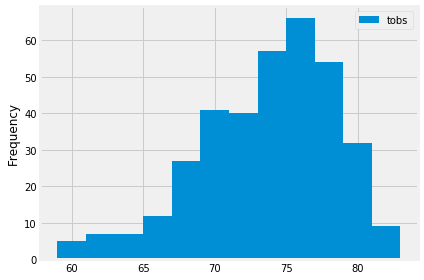

In [25]:
# Query the last 12 months of temperature observation data for this station
tobs_scores = (session
               .query(Measurement.date, Measurement.tobs)
               .filter(Measurement.station == most_active_station)
               .filter(Measurement.date >= year_ago_most_active)
               .all())
tobs = []
for t in tobs_scores:
    tobs.append(t[1])

# Plot the results as a histogram
tobs_hist = plt.hist(tobs, bins=12, label="tobs")
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Temperature Analysis (Optional)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using data from two years ago for those same dates (data from last year is not available).
my_trip_start = '2019-04-14'
my_trip_end = '2019-04-21'
start_date = dt.datetime.strptime(my_trip_start, "%Y-%m-%d") - dt.timedelta(days=365.25*2)
end_date = dt.datetime.strptime(my_trip_end, "%Y-%m-%d") - dt.timedelta(days=365.25*2)
my_trip_temps = calc_temps(start_date, end_date)
print(my_trip_temps)

[(67.0, 73.0, 83.0)]


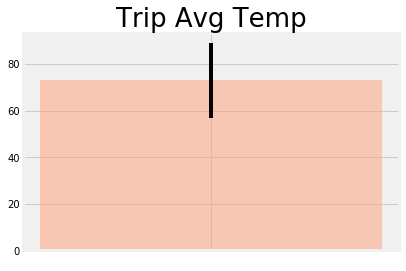

In [35]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
tmin = my_trip_temps[0][0]
tave = round(my_trip_temps[0][1],2)
tmax = my_trip_temps[0][2]
plt.bar(' ', tave, yerr=tmax-tmin, color='lightsalmon', alpha=0.5, width=0.1)
plt.title('Trip Avg Temp', fontsize=26)
plt.show()

<IPython.core.display.Javascript object>


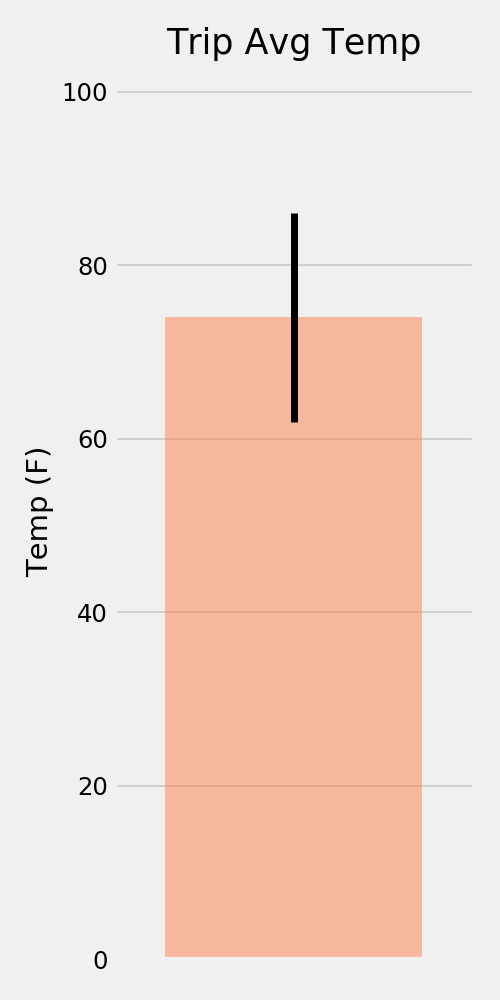

In [36]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel = [Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation,
       func.avg(Measurement.prcp)]

my_trip_rainfall = (session
                    .query(*sel)
                    .join(Station, Measurement.station == Station.station)
                    .filter(Measurement.date >= start_date)
                    .filter(Measurement.date >= end_date)
                    .group_by(Measurement.station)
                    .order_by(func.avg(Measurement.prcp).desc())
                    .all())
print(my_trip_rainfall)

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.39896226415094344), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.1824324324324324), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.15333333333333324), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.134622641509434), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.12935483870967734), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.028749999999999994), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.010833333333333334)]


## Other Recommended Analysis (Optional)

In [37]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = dt.datetime.strptime(my_trip_start, "%Y-%m-%d")
end = dt.datetime.strptime(my_trip_end, "%Y-%m-%d")

# Use the start and end date to create a range of dates
trip_dates = []
step = dt.timedelta(days=1)
while start <= end:
    trip_dates.append(start)
    start += step
    
# Strip off the year and save a list of %m-%d strings
days = []
for d in trip_dates:
    days.append(d.strftime("%m-%d"))

# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for day in days:
    normals.append(daily_normals(day)[0])
normals

[(65.0, 72.75, 81.0),
 (61.0, 71.79310344827586, 79.0),
 (62.0, 71.55357142857143, 81.0),
 (65.0, 71.93103448275862, 77.0),
 (67.0, 72.49152542372882, 77.0),
 (65.0, 72.42105263157895, 83.0),
 (64.0, 72.73684210526316, 80.0),
 (66.0, 72.32142857142857, 78.0)]

In [39]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=['tmin', 'tavg', 'tmax'])
my_dates = [t.strftime('2019-%m-%d') for t in trip_dates]
normals_df['date'] = my_dates
normals_df.set_index('date', inplace=True)
normals_df

,tmin,tavg,tmax
date,,,
2019-04-14,65.0,72.750000,81.0
2019-04-15,61.0,71.793103,79.0
2019-04-16,62.0,71.553571,81.0
2019-04-17,65.0,71.931034,77.0
2019-04-18,67.0,72.491525,77.0
2019-04-19,65.0,72.421053,83.0
2019-04-20,64.0,72.736842,80.0
2019-04-21,66.0,72.321429,78.0


['2019-04-14', '2019-04-15', '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20', '2019-04-21']


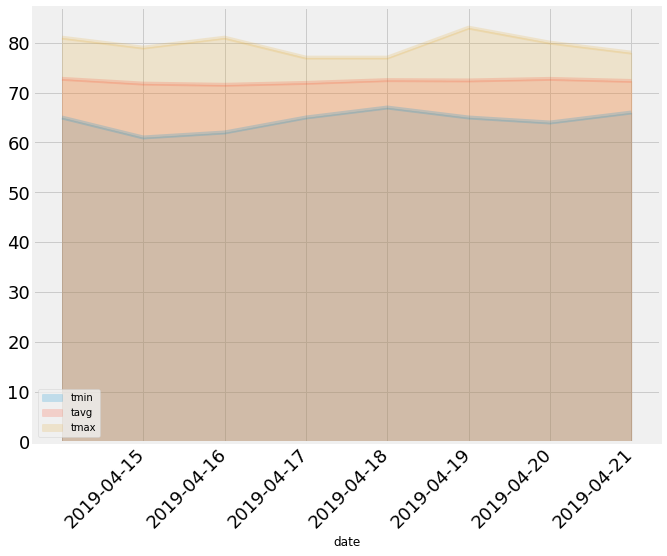

In [44]:
ax = normals_df.plot(kind='area', figsize=(10,8), stacked=False, fontsize=18, alpha=0.2)
print(my_dates)
ax.set_xticklabels(my_dates, rotation=45, ha='left')
plt.legend(loc=3)
plt.show()

<IPython.core.display.Javascript object>


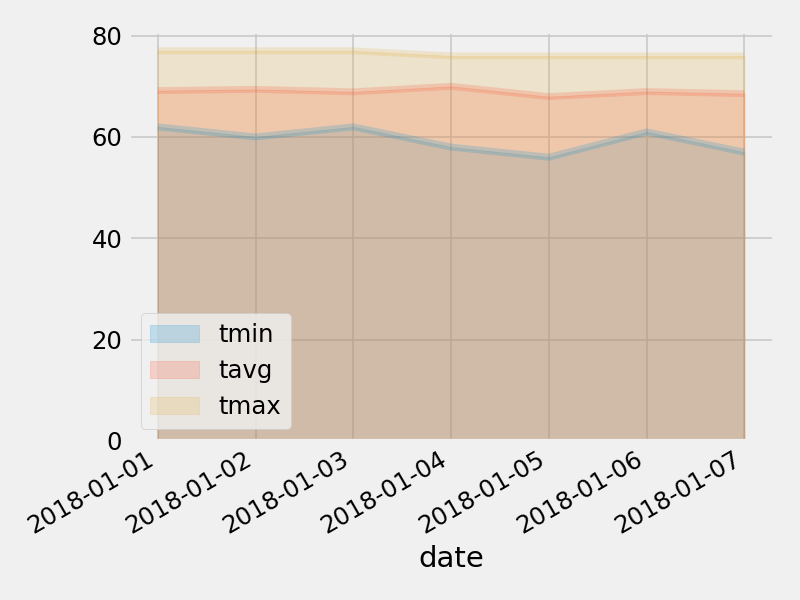

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


# Step 2 - Climate App

See file app.py